<a href="https://colab.research.google.com/github/premsugan84/CNN_Image-Classification/blob/master/Project_CNN_ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

**Mounting Google Drive**

In [2]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import cv2

from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import GlobalMaxPooling2D

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
% cd drive/My Drive/DLCP/Project 2/Data

/content/drive/My Drive/DLCP/Project 2/Data


**Loading Image and Label Dataset**

In [5]:
# Load the image file of dataset
images = np.load('images.npy')

In [6]:
labels = pd.read_csv('Labels.csv')

In [7]:
images.shape

(4750, 128, 128, 3)

In [8]:
labels.shape

(4750, 1)

**Visualize the Image**

Label: Label    Black-grass
Name: 4000, dtype: object
Label    Black-grass
Name: 4000, dtype: object


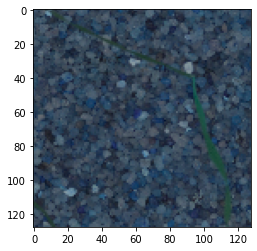

In [9]:
print("Label: {}".format(labels.loc[4000]))
print(labels.loc[4000])
plt.imshow(images[4000])

Label: Label    Loose Silky-bent
Name: 4749, dtype: object
Label    Loose Silky-bent
Name: 4749, dtype: object


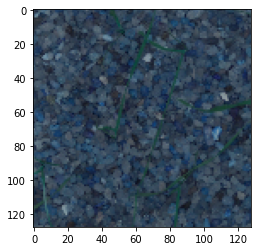

In [10]:
print("Label: {}".format(labels.loc[4749]))
print(labels.loc[4749])
plt.imshow(images[4749])

Label: Label    Small-flowered Cranesbill
Name: 0, dtype: object
Label    Small-flowered Cranesbill
Name: 0, dtype: object


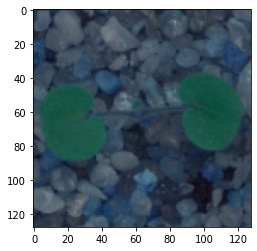

In [11]:
print("Label: {}".format(labels.loc[0]))
print(labels.loc[0])
plt.imshow(images[0])

In [12]:
labels.head

<bound method NDFrame.head of                           Label
0     Small-flowered Cranesbill
1     Small-flowered Cranesbill
2     Small-flowered Cranesbill
3     Small-flowered Cranesbill
4     Small-flowered Cranesbill
...                         ...
4745           Loose Silky-bent
4746           Loose Silky-bent
4747           Loose Silky-bent
4748           Loose Silky-bent
4749           Loose Silky-bent

[4750 rows x 1 columns]>

**Normalize the data**

In [13]:
images = images.astype('float32')

In [14]:
images = images/255

In [15]:
print("Images", images.shape)
print("Max Value in Images", images.max())
print("Min value in Images", images.min())

Images (4750, 128, 128, 3)
Max Value in Images 1.0
Min value in Images 0.0


**Gaussian Blur**

In [16]:
def sharpen_image(image):
    image_blurred = cv2.GaussianBlur(image, (0, 0), 3)
    image_sharp = cv2.addWeighted(image, 1.5, image_blurred, -0.5, 0)
    return image_sharp

In [17]:
for index, image in enumerate(images):
  try:
     images[index] = sharpen_image(image)
      
  except:
    print(index)
    continue

**Visualize the Image**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label: Label    Loose Silky-bent
Name: 4749, dtype: object
Label    Loose Silky-bent
Name: 4749, dtype: object


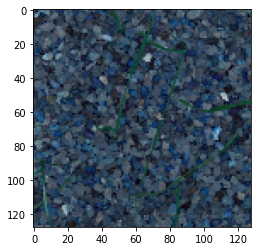

In [18]:
print("Label: {}".format(labels.loc[4749]))
print(labels.loc[4749])
plt.imshow(images[4749])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label: Label    Small-flowered Cranesbill
Name: 0, dtype: object
Label    Small-flowered Cranesbill
Name: 0, dtype: object


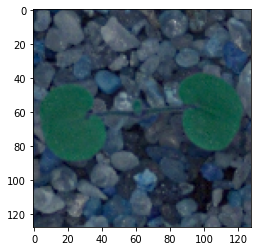

In [19]:
print("Label: {}".format(labels.loc[0]))
print(labels.loc[0])
plt.imshow(images[0])

**One hot label encoding** - 

---



In [20]:
from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
PlantName = enc.fit_transform(labels)

In [21]:
PlantName[2000]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

**Train, Test and Validation Data Split**

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, PlantName, test_size=0.3, random_state=50)

In [23]:
y_train.shape

(3325, 12)

In [24]:
y_test.shape

(1425, 12)

In [25]:
from sklearn.model_selection import train_test_split
X_test, X_val, y_test, Y_val = train_test_split(X_test,y_test, test_size = 0.5, random_state=10)

In [26]:
print(X_test.shape)
print(X_val.shape)
print(y_test.shape)
print(Y_val.shape)

(712, 128, 128, 3)
(713, 128, 128, 3)
(712, 12)
(713, 12)


**Model Building**

In [27]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(5,5),activation="relu",input_shape=(128,128,3)))
model.add(Conv2D(filters=32,kernel_size=(3,3),activation="relu"))
model.add(GlobalMaxPooling2D())
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(12,activation="softmax"))

In [28]:
model.compile(loss="categorical_crossentropy", metrics=["accuracy"],optimizer="adam")

In [37]:
model.fit(x=X_train, y=y_train, batch_size=500, epochs=50,validation_data=(X_val,Y_val))

Epoch 1/50
7/7 [==============================] - 1s 182ms/step - loss: 0.1051 - accuracy: 0.9738 - val_loss: 1.4492 - val_accuracy: 0.7153
Epoch 2/50
7/7 [==============================] - 1s 180ms/step - loss: 0.0995 - accuracy: 0.9780 - val_loss: 1.4655 - val_accuracy: 0.7111
Epoch 3/50
7/7 [==============================] - 1s 177ms/step - loss: 0.1032 - accuracy: 0.9738 - val_loss: 1.4707 - val_accuracy: 0.7041
Epoch 4/50
7/7 [==============================] - 1s 184ms/step - loss: 0.0977 - accuracy: 0.9756 - val_loss: 1.4509 - val_accuracy: 0.7139
Epoch 5/50
7/7 [==============================] - 1s 178ms/step - loss: 0.0960 - accuracy: 0.9786 - val_loss: 1.4667 - val_accuracy: 0.7139
Epoch 6/50
7/7 [==============================] - 1s 181ms/step - loss: 0.0941 - accuracy: 0.9786 - val_loss: 1.4690 - val_accuracy: 0.7055
Epoch 7/50
7/7 [==============================] - 1s 179ms/step - loss: 0.0945 - accuracy: 0.9786 - val_loss: 1.4561 - val_accuracy: 0.7083
Epoch 8/50
7/7 [====

**Evaluvate and Confusion Matrix**

In [38]:
loss2,acc2 = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %3f' % acc2)
print('Loss: %.3f' % loss2)

Accuracy: 0.765449
Loss: 1.099


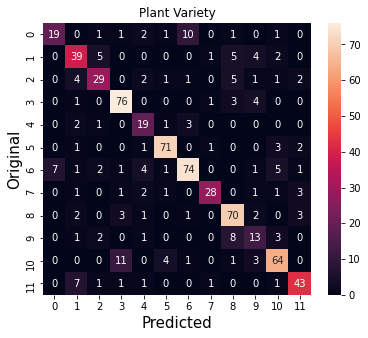

In [42]:
from sklearn.metrics import confusion_matrix
Y_pred = model.predict(X_test)  # manual threshold
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 

plt.figure(figsize=(6, 5))  # Establishing the heatmap size before plotting
ax = sns.heatmap(confusion_mtx, annot=True, fmt=".0f")
ax.set_ylabel('Original', fontsize=15)
ax.set_xlabel('Predicted', fontsize=15)
plt.title("Plant Variety")
plt.show()

**Visualize Predictions**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0 0 0 0 0 0 0 0 0 0 0 1]


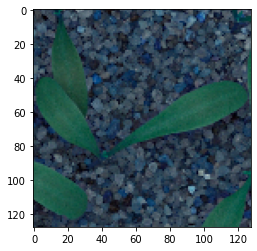

In [43]:
print(y_test[2])
plt.imshow(X_test[2])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0 1 0 0 0 0 0 0 0 0 0 0]


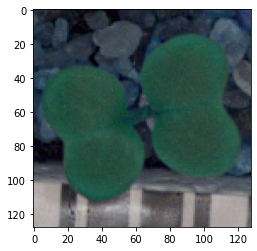

In [44]:
print(y_test[3])
plt.imshow(X_test[3])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0 0 0 0 0 0 0 0 1 0 0 0]


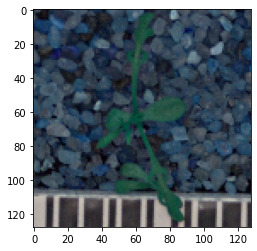

In [45]:
print(y_test[33])
plt.imshow(X_test[33])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[1 0 0 0 0 0 0 0 0 0 0 0]


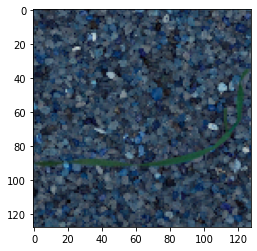

In [46]:
print(y_test[59])
plt.imshow(X_test[59])